# Students:
Liav Ermias - 211684956
Ori Barel - 207813007
Ron Elyashar - 209350644

In [ ]:
import torch
from torchvision import transforms
from torchvision.datasets import StanfordCars
from torch.utils.data import DataLoader, random_split
import torch.nn as nn
import torch.optim as optim
from torchvision.models import efficientnet_b0
from tqdm import tqdm


In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive')

drive_root = "/content/drive/My Drive"
print("Available files in Google Drive root:")
print(os.listdir(drive_root))

Mounted at /content/drive
Available files in Google Drive root:
['itin(J78C23_BAREL_ORIMR).html', '45728d44-6b80-4745-bc1a-e33c2c872a6b.jpg', '38643151-0-- (1).pdf', '38643151-0--.pdf', '×ª×\xa0×_×__×ª×©×_×_×__×©×_×¨_×_×_×_×_×__×_×§×_×_.pdf', 'IMG_5214.JPG', 'Image.jpeg', 'אורי בראל קורות חיים 2020.doc', 'סודות המוכרים המובילים באמזון.gdoc', 'לוח שידורים ושיבוצים יורו 2020.gsheet', 'CW_Employee_Data (1).rar', 'CW_Employee_Data.rar', 'IMG_6558 (1).JPG', 'IMG_6558.JPG', 'IMG_6559.JPG', 'IMG_6560 (1).JPG', 'IMG_6560.JPG', 'IMG_6561.JPG', 'IMG_6562.JPG', 'IMG_6563.JPG', 'IMG_6564.JPG', 'IMG_6566.JPG', 'IMG_6567.JPG', 'IMG_6568.JPG', 'IMG_6569.JPG', 'IMG_6570.JPG', 'IMG_6571.JPG', 'IMG_6572.JPG', 'IMG_6573.JPG', 'IMG_6574.JPG', 'IMG_6575.JPG', 'IMG_6576.JPG', 'IMG_6577.JPG', 'IMG_6578.JPG', 'IMG_6579.JPG', 'IMG_6580.JPG', 'IMG_6581.JPG', 'IMG_6582.JPG', 'IMG_6583.JPG', 'IMG_6584.JPG', 'IMG_6585.JPG', 'קטלניייי.MP4', 'DSC04894.JPG', 'DSC04895.JPG', 'DSC04893.JPG', 'DSC04896.JPG', 'DSC04897.J

In [ ]:
import shutil
import zipfile

zip_drive_path = "/content/drive/My Drive/cars196_dataset.zip"

extract_path = "/content/cars_196"

if os.path.exists(zip_drive_path):
    print(f"Copying ZIP file from Drive to Colab...")
    shutil.copy(zip_drive_path, "/content/cars196_dataset.zip")
    zip_path = "/content/cars196_dataset.zip"
else:
    zip_path = "/content/cars196_dataset.zip"

if os.path.exists(zip_path):
    print(f"Extracting {zip_path} to {extract_path}...")
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print("Extraction complete.")
else:
    print("Error: ZIP file not found in Drive or Colab. Check the path.")


Copying ZIP file from Drive to Colab...
Extracting /content/cars196_dataset.zip to /content/cars_196...
Extraction complete.


In [ ]:
from glob import glob
import os

base_dir = "/content/cars_196"
all_dirs = os.listdir(base_dir)

dataset_dir = None
for d in all_dirs:
    if "dataset_cars" in d:
        dataset_dir = os.path.join(base_dir, d)
        break

if dataset_dir and os.path.exists(dataset_dir):
    print(f" Found dataset directory: {dataset_dir}")
else:
    print(f" Dataset directory NOT found in: {base_dir}. Check manually.")

train_tfrecords = sorted(glob(os.path.join(dataset_dir, "train", "*.tfrecord*")))
test_tfrecords = sorted(glob(os.path.join(dataset_dir, "test", "*.tfrecord*")))

print(" Train TFRecord files:")
print(train_tfrecords[:3])

print("\n Test TFRecord files:")
print(test_tfrecords[:3])

if not train_tfrecords:
    print(" No train TFRecord files found.")
if not test_tfrecords:
    print(" No test TFRecord files found.")


 Found dataset directory: /content/cars_196/‏‏dataset_cars - עותק
 Train TFRecord files:
['/content/cars_196/\u200f\u200fdataset_cars - עותק/train/cars196-train.tfrecord-00000-of-00008', '/content/cars_196/\u200f\u200fdataset_cars - עותק/train/cars196-train.tfrecord-00001-of-00008', '/content/cars_196/\u200f\u200fdataset_cars - עותק/train/cars196-train.tfrecord-00002-of-00008']

 Test TFRecord files:
['/content/cars_196/\u200f\u200fdataset_cars - עותק/test/cars196-test.tfrecord-00000-of-00008', '/content/cars_196/\u200f\u200fdataset_cars - עותק/test/cars196-test.tfrecord-00001-of-00008', '/content/cars_196/\u200f\u200fdataset_cars - עותק/test/cars196-test.tfrecord-00002-of-00008']


In [ ]:
import os

dummy_path = os.path.join(dataset_dir, "train", "dummy.tfrecord")
if os.path.exists(dummy_path):
    os.remove(dummy_path)
    print(f"Removed dummy file: {dummy_path}")
else:
    print("No dummy.tfrecord file found.")


No dummy.tfrecord file found.


In [ ]:
train_tfrecords = [f for f in train_tfrecords if "dummy" not in os.path.basename(f).lower()]


In [ ]:
print("Filtered train TFRecords:")
for f in train_tfrecords:
    print("✅", f)

Filtered train TFRecords:
✅ /content/cars_196/‏‏dataset_cars - עותק/train/cars196-train.tfrecord-00000-of-00008
✅ /content/cars_196/‏‏dataset_cars - עותק/train/cars196-train.tfrecord-00001-of-00008
✅ /content/cars_196/‏‏dataset_cars - עותק/train/cars196-train.tfrecord-00002-of-00008
✅ /content/cars_196/‏‏dataset_cars - עותק/train/cars196-train.tfrecord-00003-of-00008
✅ /content/cars_196/‏‏dataset_cars - עותק/train/cars196-train.tfrecord-00004-of-00008
✅ /content/cars_196/‏‏dataset_cars - עותק/train/cars196-train.tfrecord-00005-of-00008
✅ /content/cars_196/‏‏dataset_cars - עותק/train/cars196-train.tfrecord-00006-of-00008
✅ /content/cars_196/‏‏dataset_cars - עותק/train/cars196-train.tfrecord-00007-of-00008


###Adjusting the data to PyTorch

In [ ]:
import tensorflow as tf
import numpy as np
from PIL import Image

# Parse a single TFRecord example into image and label
def parse_tfrecord(example_proto):
    feature_description = {
        'image': tf.io.FixedLenFeature([], tf.string),  # Encoded image (JPEG)
        'label': tf.io.FixedLenFeature([], tf.int64),   # Class label
    }
    parsed_example = tf.io.parse_single_example(example_proto, feature_description)
    image = tf.io.decode_jpeg(parsed_example['image'], channels=3)
    image = tf.image.resize(image, [224, 224])  # Resize for model input
    image = tf.cast(image, tf.uint8)
    return image.numpy(), parsed_example['label'].numpy()

# Load a list of TFRecord files and extract all images and labels into memory
def load_tfrecord_images_and_labels(tfrecord_files):
    images, labels = [], []
    raw_dataset = tf.data.TFRecordDataset(tfrecord_files)

    for raw_record in raw_dataset:
        try:
            image, label = parse_tfrecord(raw_record)
            images.append(Image.fromarray(image))
            labels.append(label)
        except Exception as e:
            print(f"Skipped one record due to error: {e}")
            continue

    return images, labels


In [ ]:
train_images, train_labels = load_tfrecord_images_and_labels(train_tfrecords)
test_images, test_labels = load_tfrecord_images_and_labels(test_tfrecords)


###Image Preprocessing and DataLoader Setup

In [ ]:
import torch
from torchvision import transforms
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from PIL import Image
import numpy as np

# ImageNet-style transforms: resize, normalize, and a bit of augmentation
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),  # Light data augmentation
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],  # ImageNet means
                         std=[0.229, 0.224, 0.225])   # ImageNet stds
])

# Ensures the image is a proper uint8 PIL image
def fix_image(img):
    if isinstance(img, np.ndarray):
        img = np.squeeze(img)
        img = np.clip(img, 0, 255).astype(np.uint8)
        return Image.fromarray(img)
    return img

# Apply transform to all train/test images
train_tensors = [transform(fix_image(img)) for img in train_images]
test_tensors = [transform(fix_image(img)) for img in test_images]

# Convert labels to tensors
train_labels_tensor = torch.tensor(train_labels)
test_labels_tensor = torch.tensor(test_labels)

# Split training set into train/validation
train_imgs, val_imgs, train_lbls, val_lbls = train_test_split(
    train_tensors, train_labels_tensor, test_size=0.2, random_state=42, stratify=train_labels_tensor
)

# Create TensorDatasets and DataLoaders
BATCH_SIZE = 32

train_dataset = TensorDataset(torch.stack(train_imgs), train_lbls)
val_dataset = TensorDataset(torch.stack(val_imgs), val_lbls)
test_dataset = TensorDataset(torch.stack(test_tensors), test_labels_tensor)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE)

print("Data ready. Train:", len(train_dataset), "Val:", len(val_dataset), "Test:", len(test_dataset))


 Data ready. Train: 6515 Val: 1629 Test: 8041


###Training EfficientNet-B0

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.models import efficientnet_b0
from tqdm import tqdm
import copy

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
NUM_CLASSES = 196

# Load pretrained EfficientNet-B0 and replace the classification head
model = efficientnet_b0(weights="IMAGENET1K_V1")
model.classifier[1] = nn.Linear(model.classifier[1].in_features, NUM_CLASSES)
model = model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-4)

# Early stopping setup
best_val_loss = float("inf")
patience = 5
epochs_no_improve = 0
EPOCHS = 30
best_model = copy.deepcopy(model.state_dict())

for epoch in range(EPOCHS):
    model.train()
    train_loss = 0.0

    for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{EPOCHS}"):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    # Validation phase
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    avg_train_loss = train_loss / len(train_loader)
    avg_val_loss = val_loss / len(val_loader)
    val_acc = correct / total

    print(f"Epoch [{epoch+1}/{EPOCHS}], Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}, Val Accuracy: {val_acc:.4f}")

    # Check for early stopping condition
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        best_model = copy.deepcopy(model.state_dict())
        epochs_no_improve = 0
        torch.save(model.state_dict(), "efficientnet_best.pth")
        print("Model saved (best validation loss)")
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= patience:
            print("Early stopping triggered.")
            break

print("Training complete.")
model.load_state_dict(best_model)
model.eval()


Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 128MB/s] 
Epoch 1/30: 100%|██████████| 204/204 [00:11<00:00, 17.67it/s]


Epoch [1/30], Train Loss: 5.1264, Val Loss: 4.7101, Val Accuracy: 0.1123
 Model saved (best validation loss)


Epoch 2/30: 100%|██████████| 204/204 [00:09<00:00, 21.10it/s]


Epoch [2/30], Train Loss: 4.1731, Val Loss: 3.6265, Val Accuracy: 0.2996
 Model saved (best validation loss)


Epoch 3/30: 100%|██████████| 204/204 [00:09<00:00, 21.06it/s]


Epoch [3/30], Train Loss: 3.0705, Val Loss: 2.6755, Val Accuracy: 0.4500
 Model saved (best validation loss)


Epoch 4/30: 100%|██████████| 204/204 [00:09<00:00, 21.00it/s]


Epoch [4/30], Train Loss: 2.1406, Val Loss: 1.9749, Val Accuracy: 0.5801
 Model saved (best validation loss)


Epoch 5/30: 100%|██████████| 204/204 [00:09<00:00, 20.78it/s]


Epoch [5/30], Train Loss: 1.4788, Val Loss: 1.5669, Val Accuracy: 0.6440
 Model saved (best validation loss)


Epoch 6/30: 100%|██████████| 204/204 [00:09<00:00, 20.94it/s]


Epoch [6/30], Train Loss: 1.0037, Val Loss: 1.2925, Val Accuracy: 0.6943
 Model saved (best validation loss)


Epoch 7/30: 100%|██████████| 204/204 [00:09<00:00, 20.84it/s]


Epoch [7/30], Train Loss: 0.6789, Val Loss: 1.1173, Val Accuracy: 0.7293
 Model saved (best validation loss)


Epoch 8/30: 100%|██████████| 204/204 [00:09<00:00, 21.00it/s]


Epoch [8/30], Train Loss: 0.4706, Val Loss: 1.0077, Val Accuracy: 0.7471
 Model saved (best validation loss)


Epoch 9/30: 100%|██████████| 204/204 [00:09<00:00, 21.07it/s]


Epoch [9/30], Train Loss: 0.3414, Val Loss: 0.9444, Val Accuracy: 0.7471
 Model saved (best validation loss)


Epoch 10/30: 100%|██████████| 204/204 [00:09<00:00, 21.00it/s]


Epoch [10/30], Train Loss: 0.2488, Val Loss: 0.9021, Val Accuracy: 0.7563
 Model saved (best validation loss)


Epoch 11/30: 100%|██████████| 204/204 [00:09<00:00, 20.84it/s]


Epoch [11/30], Train Loss: 0.1874, Val Loss: 0.8577, Val Accuracy: 0.7673
 Model saved (best validation loss)


Epoch 12/30: 100%|██████████| 204/204 [00:09<00:00, 20.83it/s]


Epoch [12/30], Train Loss: 0.1451, Val Loss: 0.8356, Val Accuracy: 0.7784
 Model saved (best validation loss)


Epoch 13/30: 100%|██████████| 204/204 [00:09<00:00, 20.99it/s]


Epoch [13/30], Train Loss: 0.1156, Val Loss: 0.8083, Val Accuracy: 0.7741
 Model saved (best validation loss)


Epoch 14/30: 100%|██████████| 204/204 [00:09<00:00, 21.06it/s]


Epoch [14/30], Train Loss: 0.0958, Val Loss: 0.8033, Val Accuracy: 0.7778
 Model saved (best validation loss)


Epoch 15/30: 100%|██████████| 204/204 [00:09<00:00, 21.05it/s]


Epoch [15/30], Train Loss: 0.0756, Val Loss: 0.8034, Val Accuracy: 0.7766


Epoch 16/30: 100%|██████████| 204/204 [00:09<00:00, 21.04it/s]


Epoch [16/30], Train Loss: 0.0662, Val Loss: 0.8079, Val Accuracy: 0.7802


Epoch 17/30: 100%|██████████| 204/204 [00:09<00:00, 21.02it/s]


Epoch [17/30], Train Loss: 0.0628, Val Loss: 0.8052, Val Accuracy: 0.7815


Epoch 18/30: 100%|██████████| 204/204 [00:09<00:00, 21.07it/s]


Epoch [18/30], Train Loss: 0.0487, Val Loss: 0.7938, Val Accuracy: 0.7851
 Model saved (best validation loss)


Epoch 19/30: 100%|██████████| 204/204 [00:09<00:00, 20.96it/s]


Epoch [19/30], Train Loss: 0.0411, Val Loss: 0.7911, Val Accuracy: 0.7968
 Model saved (best validation loss)


Epoch 20/30: 100%|██████████| 204/204 [00:09<00:00, 20.95it/s]


Epoch [20/30], Train Loss: 0.0394, Val Loss: 0.8229, Val Accuracy: 0.7858


Epoch 21/30: 100%|██████████| 204/204 [00:09<00:00, 21.01it/s]


Epoch [21/30], Train Loss: 0.0360, Val Loss: 0.7988, Val Accuracy: 0.7802


Epoch 22/30: 100%|██████████| 204/204 [00:09<00:00, 21.00it/s]


Epoch [22/30], Train Loss: 0.0384, Val Loss: 0.8394, Val Accuracy: 0.7815


Epoch 23/30: 100%|██████████| 204/204 [00:09<00:00, 20.85it/s]


Epoch [23/30], Train Loss: 0.0326, Val Loss: 0.8198, Val Accuracy: 0.7870


Epoch 24/30: 100%|██████████| 204/204 [00:09<00:00, 21.03it/s]


Epoch [24/30], Train Loss: 0.0346, Val Loss: 0.8389, Val Accuracy: 0.7851
 Early stopping triggered.
Training complete.


EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [ ]:
model.load_state_dict(torch.load("efficientnet_best.pth"))
model.eval()

embedding_model = torch.nn.Sequential(*(list(model.children())[:-1]))
embedding_model = embedding_model.to(device)
embedding_model.eval()


Sequential(
  (0): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivation(
    

###Extract new embeddings

In [ ]:
import numpy as np

def extract_embeddings(dataloader):
    features = []
    labels = []

    with torch.no_grad():
        for images, lbls in tqdm(dataloader, desc="Extracting embeddings"):
            images = images.to(device)
            feats = embedding_model(images).squeeze(-1).squeeze(-1)  # Output shape: (B, 1280, 1, 1) → (B, 1280)
            features.append(feats.cpu().numpy())
            labels.append(lbls.numpy())

    features = np.vstack(features)
    labels = np.hstack(labels)
    return features, labels

train_features, train_labels = extract_embeddings(train_loader)
test_features, test_labels = extract_embeddings(test_loader)

print(" Feature extraction done.")
print(f"Train features: {train_features.shape}, labels: {train_labels.shape}")
print(f"Test features: {test_features.shape}, labels: {test_labels.shape}")


Extracting embeddings: 100%|██████████| 252/252 [00:04<00:00, 60.36it/s]

 Feature extraction done.
Train features: (6515, 1280), labels: (6515,)
Test features: (8041, 1280), labels: (8041,)


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# cosine_similarity
similarity_matrix = cosine_similarity(test_features, train_features)
print(" Similarity matrix shape:", similarity_matrix.shape)


 Similarity matrix shape: (8041, 6515)


###precision k

In [ ]:
import numpy as np

def precision_at_k(similarity_matrix, test_labels, train_labels, k=5):
    correct = 0
    total = similarity_matrix.shape[0]

    for i in range(total):
        top_k_indices = np.argsort(similarity_matrix[i])[::-1][:k]
        top_k_labels = train_labels[top_k_indices]
        correct += np.sum(top_k_labels == test_labels[i])

    return correct / (total * k)

for k in [1, 2, 4, 8, 10]:
    score = precision_at_k(similarity_matrix, test_labels, train_labels, k)
    print(f"Precision@{k}: {score:.4f}")


Precision@1: 0.7668
Precision@2: 0.7627
Precision@4: 0.7544
Precision@8: 0.7447
Precision@10: 0.7406


<ipython-input-30-4ccf4d79e21f>:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab20", len(unique_labels))


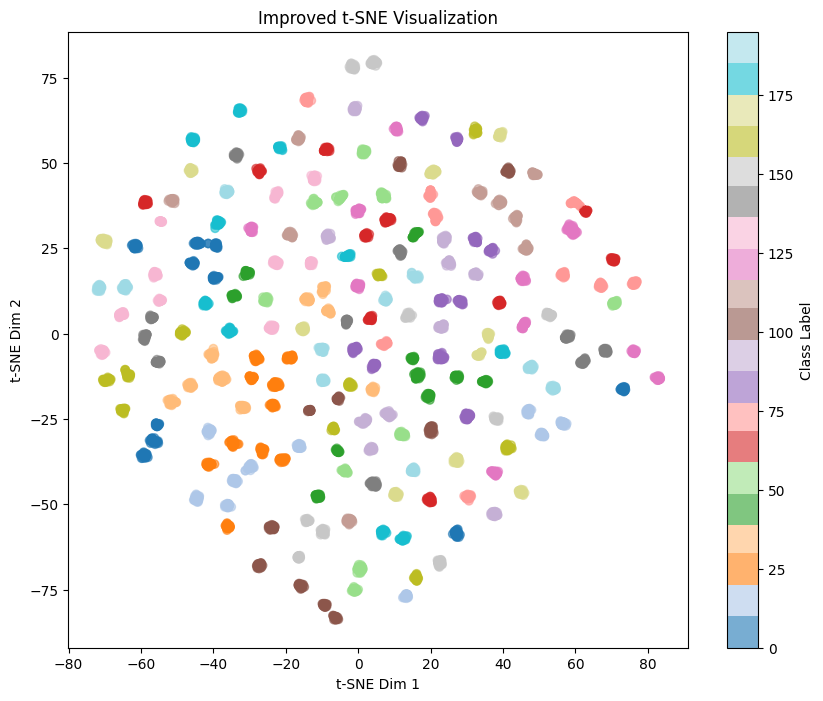

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

tsne = TSNE(n_components=2, perplexity=40, learning_rate=200, random_state=42)
embedded_2d = tsne.fit_transform(train_features)

unique_labels = np.unique(train_labels)
colors = plt.cm.get_cmap("tab20", len(unique_labels))

plt.figure(figsize=(10, 8))
scatter = plt.scatter(embedded_2d[:, 0], embedded_2d[:, 1], c=train_labels, cmap=colors, alpha=0.6)
plt.colorbar(scatter, label="Class Label")
plt.title("Improved t-SNE Visualization")
plt.xlabel("t-SNE Dim 1")
plt.ylabel("t-SNE Dim 2")
plt.show()


###Now the same thing on test results

<ipython-input-31-9fa60fa46ada>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab20", len(unique_test_labels))


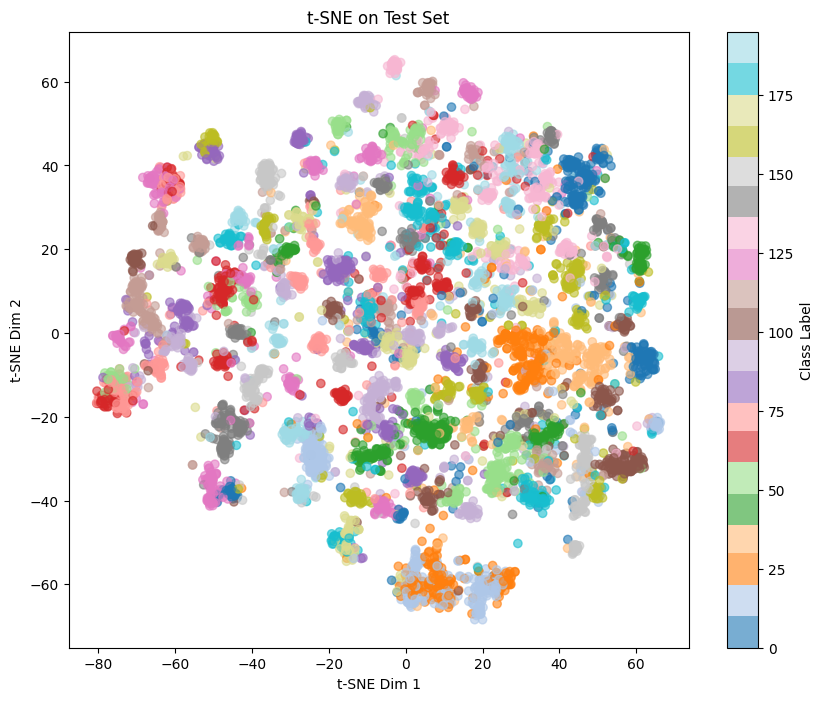

In [ ]:
tsne_test = TSNE(n_components=2, perplexity=40, learning_rate=200, random_state=42)
embedded_test_2d = tsne_test.fit_transform(test_features)

unique_test_labels = np.unique(test_labels)
colors = plt.cm.get_cmap("tab20", len(unique_test_labels))

plt.figure(figsize=(10, 8))
scatter = plt.scatter(embedded_test_2d[:, 0], embedded_test_2d[:, 1], c=test_labels, cmap=colors, alpha=0.6)
plt.colorbar(scatter, label="Class Label")
plt.title("t-SNE on Test Set")
plt.xlabel("t-SNE Dim 1")
plt.ylabel("t-SNE Dim 2")
plt.show()


In [ ]:
from sklearn.metrics import pairwise_distances

def compute_precision_at_k(test_embeds, test_labels, k=5):
    distances = pairwise_distances(test_embeds, test_embeds, metric="cosine")
    sorted_indices = np.argsort(distances, axis=1)

    correct_at_k = 0
    for i in range(len(test_labels)):
        top_k_indices = sorted_indices[i, 1:k+1]
        top_k_labels = test_labels[top_k_indices]
        correct_at_k += np.sum(top_k_labels == test_labels[i])

    return correct_at_k / (len(test_labels) * k)

precision_test_1 = compute_precision_at_k(test_features, test_labels, k=1)
precision_test_5 = compute_precision_at_k(test_features, test_labels, k=5)
precision_test_10 = compute_precision_at_k(test_features, test_labels, k=10)

print(f"Precision@1 on Test Set: {precision_test_1:.4f}")
print(f"Precision@5 on Test Set: {precision_test_5:.4f}")
print(f"Precision@10 on Test Set: {precision_test_10:.4f}")


Precision@1 on Test Set: 0.7510
Precision@5 on Test Set: 0.7033
Precision@10 on Test Set: 0.6699


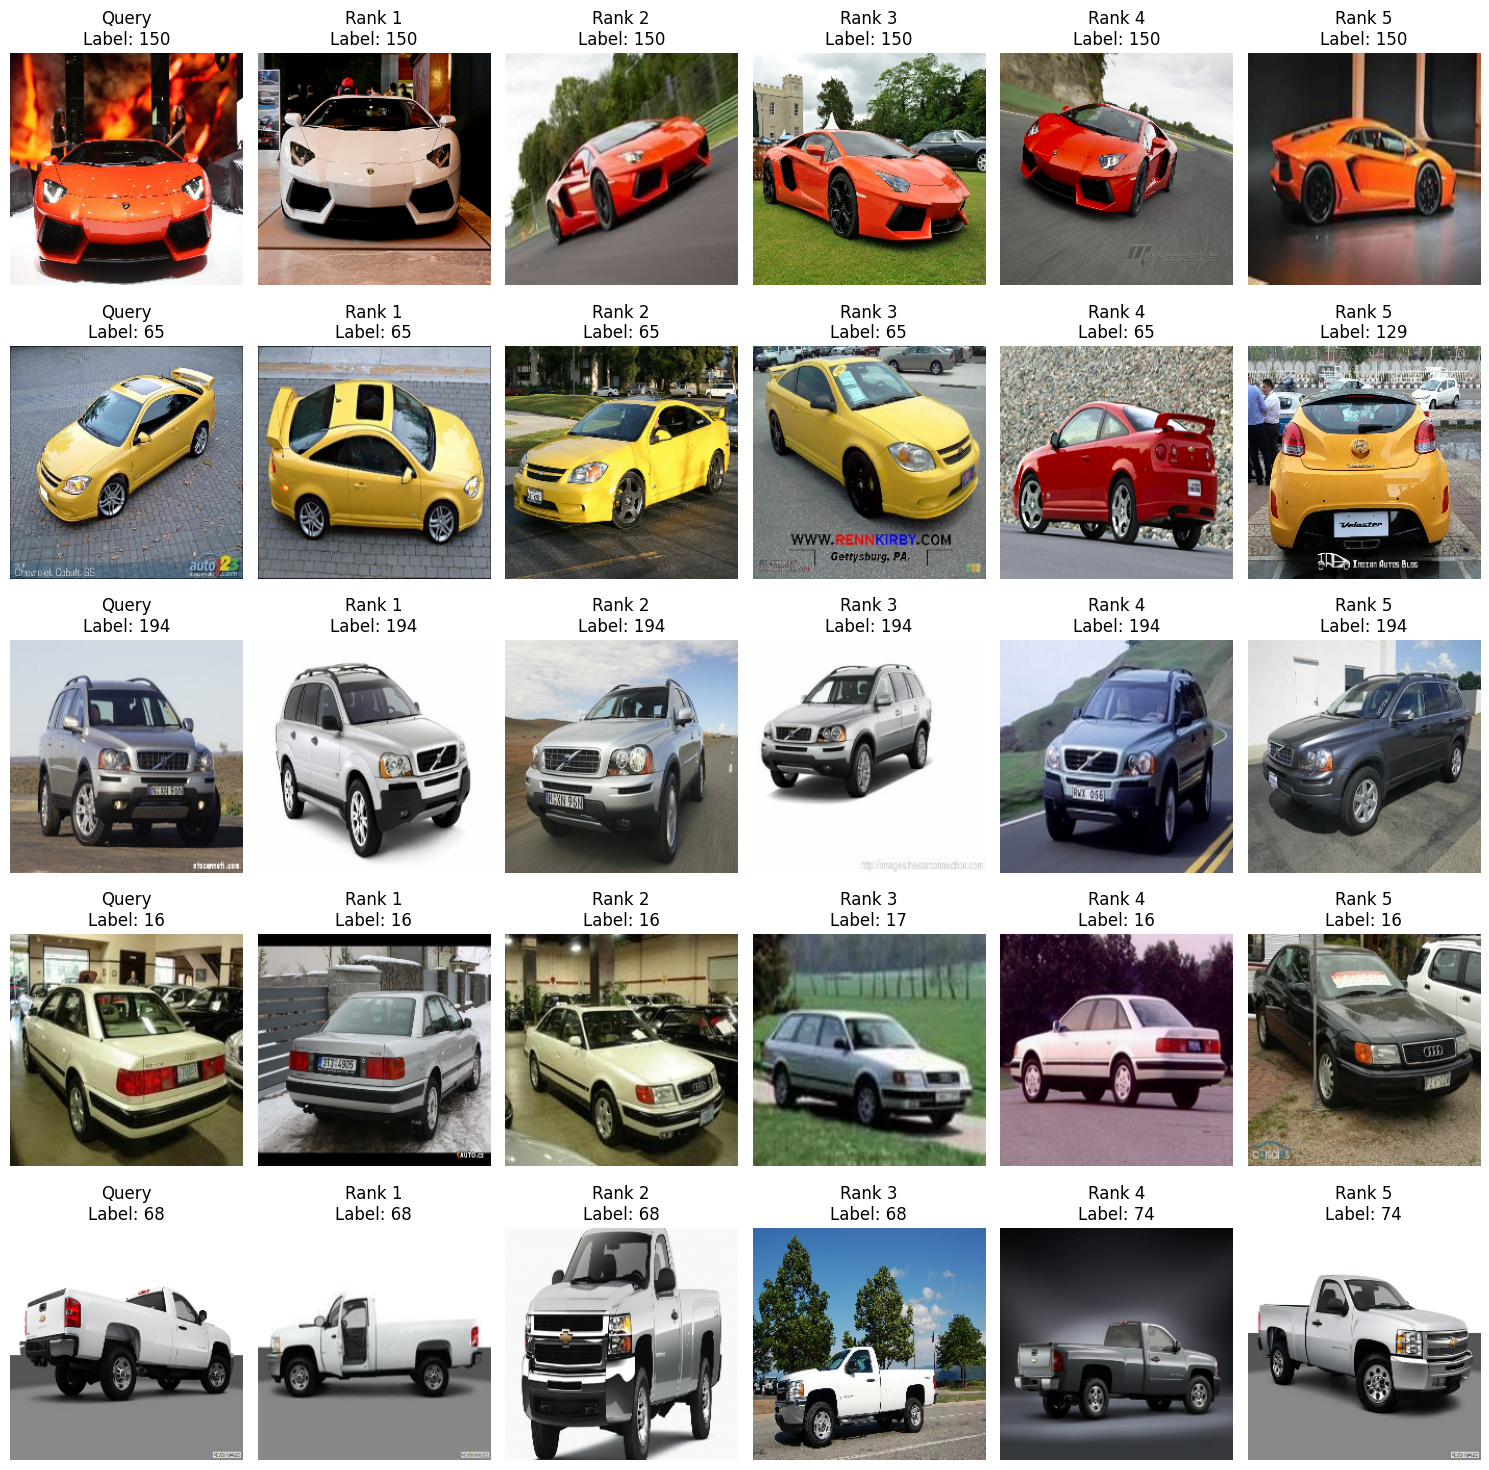

In [ ]:
import random

num_examples = 5  #showing 5 examples
random_indices = random.sample(range(len(test_labels)), num_examples)

fig, axes = plt.subplots(num_examples, 6, figsize=(15, 3*num_examples))

for i, idx in enumerate(random_indices):
    query_img = test_images[idx]
    query_label = test_labels[idx]

    distances = pairwise_distances(test_features[idx].reshape(1, -1), test_features, metric="cosine")
    sorted_indices = np.argsort(distances[0])[1:6]
    axes[i, 0].imshow(query_img)
    axes[i, 0].set_title(f"Query\nLabel: {query_label}")
    axes[i, 0].axis("off")

    for j, match_idx in enumerate(sorted_indices):
        match_img = test_images[match_idx]
        match_label = test_labels[match_idx]

        axes[i, j+1].imshow(match_img)
        axes[i, j+1].set_title(f"Rank {j+1}\nLabel: {match_label}")
        axes[i, j+1].axis("off")

plt.tight_layout()
plt.show()
